In [203]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import ast
from collections import Counter
import warnings
import re

warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

pd.set_option('display.max_columns', None)

## 1. Entendendo a base de dados e tratando os dados

In [204]:
# importação da base de dados a ser utilizada
data = pd.read_excel('base_oficial.xlsx')

In [205]:
# criando um back up
df = data.copy(deep = True)

df.drop(columns = ['Unnamed: 0', "objectid", "label", "gamelink"], inplace = True)
df.head()

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt,boardgamedesigner,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,min_community,max_community,totalvotes,playerage,languagedependence,usersrated,average,baverage,stddev,avgweight,numweights,numgeeklists,numtrading,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast
0,Gloomhaven,2017,1,1,4,60,120,12,1,3,9,23,5,12,4,19,7,"['Isaac Childres""']","['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Campaign / Battle Card Driven', 'Cooperative...","['Gloomhaven: Forgotten Circles', 'Gloomhaven:...","['Campaign Games', 'Components: Miniatures', '...",3.0,4.0,827.0,14,4,31254.0,8.85292,8.58424,1.59819,3.8078,1311,3657,313,1365,5972,8933078,230213,3478,7,471,31,139
1,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,2,1,11,20,2,8,0,33,3,"['Rob Daviau""', 'Matt Leacock""']",['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Campaign Games', 'Legacy', 'Pandemic']",4.0,4.0,549.0,12,4,34729.0,8.62499,8.47159,1.59463,2.8301,971,3612,272,771,5477,2971746,196621,1090,9,597,69,164
2,Terraforming Mars,2016,3,1,5,120,120,12,1,1,20,20,6,9,15,29,6,"['Jacob Fryxelius""']",['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...",['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Czec...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...",['French Championship Promo Cards (fan expansi...,"['Fryxgames Future Timeline', 'Planets: Mars',...",3.0,4.0,1252.0,12,3,48339.0,8.42299,8.26781,1.36938,3.2313,1863,5941,277,2068,7274,4724387,245997,4380,14,1158,60,148
3,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,1,4,13,3,3,5,1,14,2,"['Vlaada Chv\\u00e1til""']","['Filip Murmak', 'Radim Pech', 'Jakub Politzer...","['Czech Games Edition', 'Cranio Creations', 'D...",['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Chinese edition', 'Czech edition', 'English ...","['Action Points', 'Auction/Bidding', 'Auction:...",['Through the Ages: New Leaders and Wonders'],"['Tableau Building', 'Through the Ages']",3.0,4.0,436.0,14,4,18269.0,8.49419,8.23513,1.49542,4.3850,891,2083,280,1049,2660,2448074,54284,511,5,185,30,42
4,Brass Birmingham,2018,5,2,4,60,120,14,3,3,8,6,3,8,0,9,6,"['Gavan Brown""', 'Matt Tolman""', 'Martin Walla...","['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'BoardM Factory', 'Conclave Editora...",['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['English deluxe edition', 'English retail edi...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Beer', 'Brass', 'Cities: Birmingham (England...",3.0,4.0,242.0,14,1,10070.0,8.62031,8.20459,1.22876,3.9122,467,1039,37,1077,1702,894621,23336,815,3,124,13,21


In [206]:
# entendendo o formato dos dados e colunas
df.shape

(20000, 48)

- A base possui **20000** pontos de dados e **48** colunas úteis

In [207]:
# informações de estatísticas descritivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearpublished,20000.0,1981.268700,219.223277,-3500.0,1997.00000,2008.000000,2015.000000,2.021000e+03
sortindex,20000.0,10000.500000,5773.647028,1.0,5000.75000,10000.500000,15000.250000,2.000000e+04
minplayers,20000.0,2.055250,0.745537,0.0,2.00000,2.000000,2.000000,1.000000e+01
maxplayers,20000.0,5.592150,15.049210,0.0,4.00000,4.000000,6.000000,9.990000e+02
minplaytime,20000.0,68.096450,466.502106,0.0,20.00000,30.000000,60.000000,6.000000e+04
maxplaytime,20000.0,94.289450,1005.751960,0.0,30.00000,45.000000,90.000000,1.200000e+05
minage,20000.0,9.476350,3.738842,0.0,8.00000,10.000000,12.000000,2.500000e+01
boardgamedesigner_cnt,20000.0,1.339200,0.787003,0.0,1.00000,1.000000,2.000000,2.100000e+01
boardgameartist_cnt,20000.0,1.379250,4.768926,0.0,0.00000,1.000000,2.000000,5.080000e+02
boardgamepublisher_cnt,20000.0,2.500100,5.082961,1.0,1.00000,1.000000,2.000000,1.740000e+02


*Observações:*

- Nota-se valores incongruentes em **yearpublished**, pois possui valores negativos.<br>
- No geral, as **colunas apresentam alta variância.**<br>
- O valor do desvio padrão de **siteviews** é extremamaente alto, o que indica uma alta variância desses dados.

In [208]:
df.isnull().sum()

name                         0
yearpublished                0
sortindex                    0
minplayers                   0
maxplayers                   0
minplaytime                  0
maxplaytime                  0
minage                       0
boardgamedesigner_cnt        0
boardgameartist_cnt          0
boardgamepublisher_cnt       0
boardgamehonor_cnt           0
boardgamecategory_cnt        0
boardgamemechanic_cnt        0
boardgameexpansion_cnt       0
boardgameversion_cnt         0
boardgamefamily_cnt          0
boardgamedesigner            0
boardgameartist              0
boardgamepublisher           0
boardgamehonor               0
boardgamecategory            0
boardgameversion             0
boardgamemechanic            0
boardgameexpansion           0
boardgamefamily              0
min_community             5859
max_community             5197
totalvotes                  96
playerage                   97
languagedependence           0
usersrated                  97
average 

Temos valores ausentes nas seguintes colunas: **min_community**, **max_community**, **totalvotes**, **playerage**, **usersrated**, **average** e **baverage**

In [209]:
# identificando valores únicos por coluna
df.nunique()

name                      19546
yearpublished               190
sortindex                 20000
minplayers                   11
maxplayers                   53
minplaytime                  87
maxplaytime                 109
minage                       22
boardgamedesigner_cnt        15
boardgameartist_cnt          59
boardgamepublisher_cnt       76
boardgamehonor_cnt           32
boardgamecategory_cnt        15
boardgamemechanic_cnt        17
boardgameexpansion_cnt       87
boardgameversion_cnt        108
boardgamefamily_cnt          31
boardgamedesigner          8552
boardgameartist           10794
boardgamepublisher        10006
boardgamehonor             2582
boardgamecategory          6401
boardgameversion           7893
boardgamemechanic          6456
boardgameexpansion         4305
boardgamefamily            9746
min_community                17
max_community                25
totalvotes                  359
playerage                    76
languagedependence            6
usersrat

*Observações:*

- Colunas com quantidades muito elevadas de valores únicos podem ser consideradas contínuas, ao passo que outras com uma quantidade muito pequena podem ser consideradas categóricas.
- Estão sendo analisados **19546 jogos diferentes.**

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    20000 non-null  object 
 1   yearpublished           20000 non-null  int64  
 2   sortindex               20000 non-null  int64  
 3   minplayers              20000 non-null  int64  
 4   maxplayers              20000 non-null  int64  
 5   minplaytime             20000 non-null  int64  
 6   maxplaytime             20000 non-null  int64  
 7   minage                  20000 non-null  int64  
 8   boardgamedesigner_cnt   20000 non-null  int64  
 9   boardgameartist_cnt     20000 non-null  int64  
 10  boardgamepublisher_cnt  20000 non-null  int64  
 11  boardgamehonor_cnt      20000 non-null  int64  
 12  boardgamecategory_cnt   20000 non-null  int64  
 13  boardgamemechanic_cnt   20000 non-null  int64  
 14  boardgameexpansion_cnt  20000 non-null

A coluna **playerage** deveria possuir dados númericos, mas apresenta dados do tipo objeto, portanto, isso deve ser investigado.

In [211]:
# preenchendo valores do tipo '(no votes)' com nan para ser possível uma análise numérica
df.loc[df.playerage == '(no votes)', 'playerage'] = np.nan

Existem alguns dados em unicode que devem ser transformados para texto comum

In [212]:
# decodificando valores do tipo unicode
for linha in range(df.shape[0]):

    if type(df.playerage[linha]) is str:
        df.playerage[linha] = df.playerage[linha].encode().decode('unicode-escape') 

É mais fácil trabalhar com game_age do que com yearpublished

In [213]:
df['age'] = 2023 - df['yearpublished']

# Drop the 'year published' column if you don't need it anymore
df.drop(columns='yearpublished', inplace=True)

As colunas minplaytime e maxplaytime podem ser unidas, sendo substituídas por uma "meanplaytime" aproximada

In [214]:
df["meanplaytime"] = (df["maxplaytime"] + df["minplaytime"])/2

print(df["meanplaytime"])

0         90.0
1         60.0
2        120.0
3        120.0
4         90.0
         ...  
19995     90.0
19996     20.0
19997     20.0
19998     30.0
19999     20.0
Name: meanplaytime, Length: 20000, dtype: float64


Apesar de conter listas, nem sempre as colunas boardgamecategory vem com formatadas. Vamos resolver isso.

In [215]:
df = data

# Vamos agrupar as variáveis categóricas de interesse em uma tupla
boardgame_categorical_type_variables = tuple(col for col in data.columns if 'boardgame' in col and data[col].dtype == 'object')

def clean_string_with_regex(string):
    if isinstance(string, str):
        string = re.sub(r'\(Uncredited\)"', 'Uncredited', string)
        string = re.sub(r'\\"', '', string)
        string = re.sub(r'\)"', '', string)
        string = re.sub(r'\!"', '', string)
        string = re.sub(r'\?"', '', string)
        string = re.sub(r'\."', '', string)
        string = re.sub(r'\*"', '', string)
        if "Wenda" in string:
            string = string.replace(f"Wenda O\'Reilly", "Wenda O.")
        string = re.sub(r'(\w)"', r'\1', string) 
        return string.strip() 
    else:
        return string



def turn_string_list_in_list(col):
    df[col] = df[col].apply(lambda x: ast.literal_eval(x.replace("'", '"')) if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: np.nan if x is None else x)
    return df[col]



for column in boardgame_categorical_type_variables:
    df[column] = df[column].apply(clean_string_with_regex)
    df[column] = turn_string_list_in_list(column)




## 2. Explorando os dados

### Análise das variáveis

Vamos tentar ter uma visão geral das nossas variáveis

In [202]:
def categorical_graph(col):
 
  # Concatenate lists from the column
  combined_categories = sum(df[col], [])

  # Get frequencies of appearance of categories
  frequency_counts = Counter(combined_categories)

  # Define the threshold
  threshold = 100

  # Filter elements that are above the threshold
  frequency_counts_after_threshold = {element: freq for element, freq in frequency_counts.items() if freq > threshold}

  # Sort elements by frequency in descending order
  sorted_elements = sorted(frequency_counts_after_threshold.items(), key=lambda x: x[1], reverse=True)

  # Extract keys (categories) and values (frequencies) after sorting
  sorted_categories = [elem[0] for elem in sorted_elements]
  sorted_frequencies = [elem[1] for elem in sorted_elements]

  # Create a Plotly bar chart with sorted elements by frequency
  fig = px.bar(x=sorted_categories, y=sorted_frequencies)
  fig.update_layout(
      xaxis=dict(title='Elementos'),
      yaxis=dict(title='Frequência'),
      title=f'Frequência de elementos de {col} (Ordenado por Frequência)',
      xaxis_tickangle=-45
  )
  fig.show()

def numerical_graph(col):
  plt.figure(figsize=(4, 3))
  plt.hist(data[col], bins=10, color= 'blue', edgecolor='black', alpha=0.7)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

for col in boardgame_categorical_type_variables:
  categorical_graph(col)

### Análise de correlações

Primeiro, escolheremos as **variáveis alvo**, ou seja, escolheremos aquelas variáveis que possuem mais peso para o modelo de negócio.

*Variáveis Alvo:*

- 'numwanting': quanto mais pessoas desejam um jogo, maior a probabilidade desse jogo ser vendido.
- 'numtrading': um jogo com alto número de vendas indica que deve receber o foco de campanhas de marketing, pois possui maior probabilidade de ser vendido novamente

**Objetivo:** Encontrar as variáveis que melhor se relacionam com as nossas variáveis alvo. Assim, poderemos aprofundar melhor as análises nessas variáveis que causam maior impacto no modelo de negócio.

In [15]:
# utilizando apenas as colunas numericas
colunas_numericas = df.select_dtypes(include = ['int64', 'float64']).columns

# criando uma matriz de correlação
matriz_correlaçao = df[colunas_numericas].corr()

Algumas colunas não fazem muito sentido para análise, a exemplo de obectid, pois são valores únicos e não agregam valor. Esses valores serão dropados.

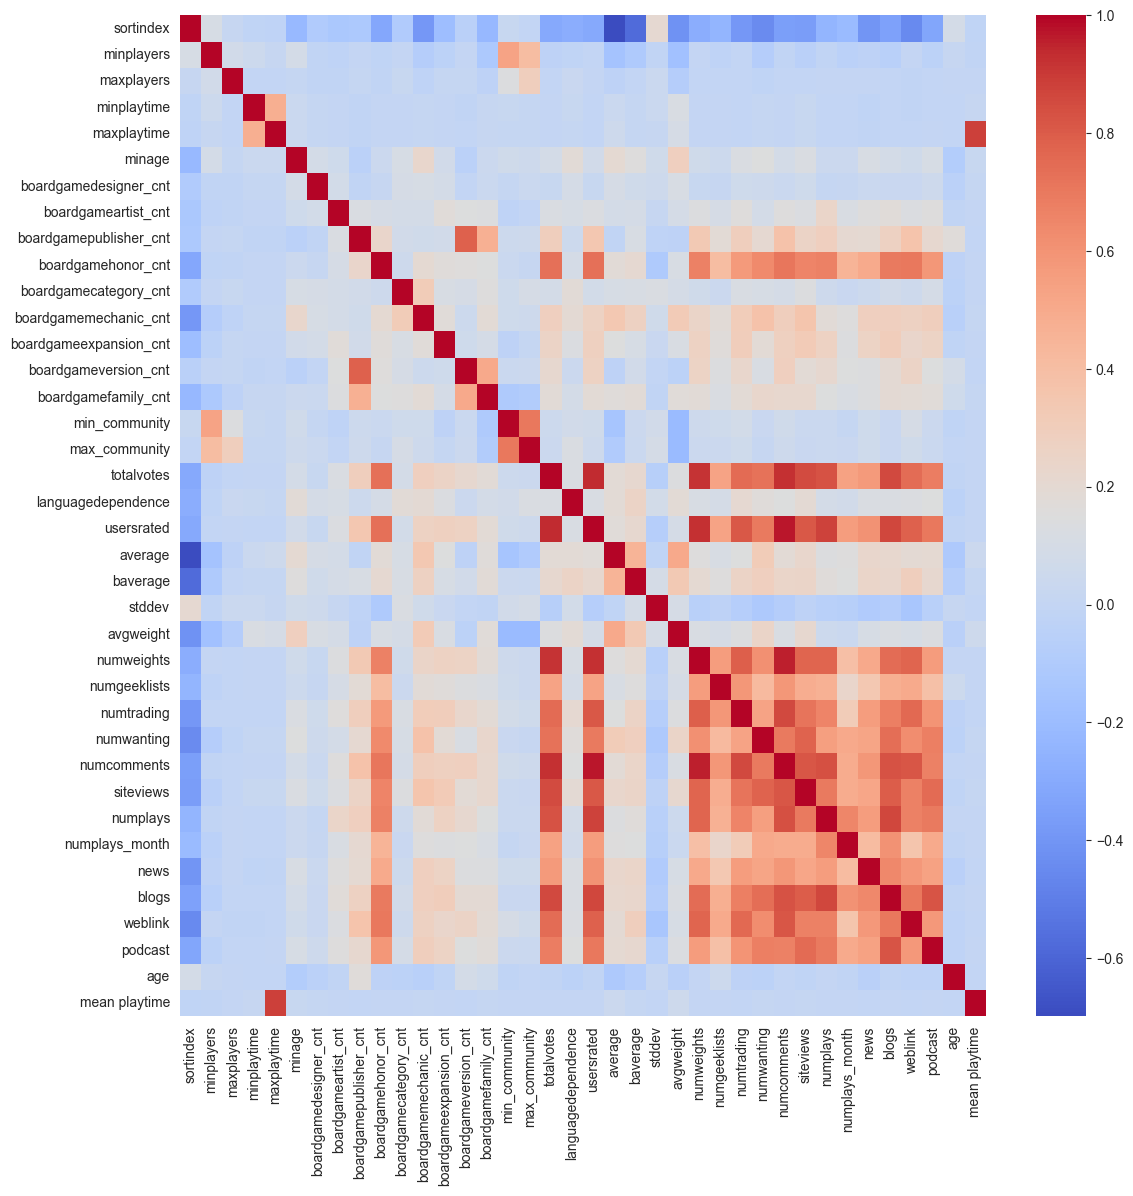

In [16]:
# ajustando o tamanho da figura
plt.figure(figsize = (13, 13))

# plotando em um grafico
sns.heatmap(data = matriz_correlaçao, cmap = 'coolwarm')

plt.show()

*Observações:*

- Nota-se que algumas variáveis possuem alta correlação com outras variáveis.<br>
- Iremos observar melhor essas relações em uma abordagem mais aprofundada.

## 3. Aprofundamento e direcionamento da análise

### Análise das variáveis numéricas

**Objetivo:** explorar mais aprofundadamente as variáveis que melhor se relacionam com nossas variáveis alvo.

**Variáveis selecionadas:** 'sortindex', 'blogs', 'news', 'numplays_month', 'numweights', 'numgeeklists', 'numcomments', 'siteviews', 'numplays', 'baverage', 'average', 'usersrated', 'totalvotes', 'boardgamemechanic_cnt', 'boardgamehonor_cnt', 'boardgameexpansion', 'boardgamepublisher' e 'sortindex'.

In [17]:
# Criar o scatter plot
fig = px.scatter(df[['sortindex', 'numtrading']])

# Mostrar o plot
fig.show()

## 4. Clusterização dos jogos através de uma avaliação KNN

### a) Tratamento de dados e seleção das variáveis

De início, precisamos transformar as características categóricas dos dados em variáveis numéricas (Como Boardgame Category)

In [18]:
import ast
from collections import Counter

data = pd.read_excel('base_oficial.xlsx')

def turn_string_list_in_list(dataframe, col):
    dataframe[col] = dataframe[col].apply(lambda x: ast.literal_eval(x.replace("'", '"')) if isinstance(x, str) else x)
    return dataframe[col]

data["boardgamecategory"] = turn_string_list_in_list(data, 'boardgamecategory')

data['boardgamemechanic'] = turn_string_list_in_list(data, "boardgamemechanic")

# Concatenate all lists in the 'boardgamecategory' column
combined_categories = sum(data['boardgamecategory'], [])

# Get frequency counts of elements
frequency_counts = Counter(combined_categories)

threshold = 25
data['boardgamecategory'] = data['boardgamecategory'].apply(lambda lst: [elem if frequency_counts[elem] >= threshold else pd.NA for elem in lst])



# Now perform the subsequent operations on the updated DataFrame 'data'
one_hot_categories = pd.get_dummies(data["boardgamecategory"].apply(pd.Series).stack()).groupby(level=0).sum()

# Concatenate all lists in the 'boardgamecategory' column
combined_categories = sum(data['boardgamemechanic'], [])

# Get frequency counts of elements
frequency_counts = Counter(combined_categories)

threshold = 25
data['boardgamemechanic'] = data['boardgamemechanic'].apply(lambda lst: [elem if frequency_counts[elem] >= threshold else pd.NA for elem in lst])

one_hot_mechanics = pd.get_dummies(data["boardgamemechanic"].apply(pd.Series).stack()).groupby(level=0).sum()

encoded_df = pd.concat([data, one_hot_categories, one_hot_mechanics], axis=1)

encoded_df.head()



,Unnamed: 0,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,label,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt,boardgamedesigner,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,gamelink,min_community,max_community,totalvotes,playerage,languagedependence,usersrated,average,baverage,stddev,avgweight,numweights,numgeeklists,numtrading,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast,Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,American West,Ancient,Animals,Arabian,Aviation / Flight,Bluffing,Book,Card Game,Childrens Game,City Building,Civil War,Civilization,Collectible Components,Comic Book / Strip,Deduction,Dice,Economic,Educational,Electronic,Environmental,Expansion for Base-game,Exploration,Fantasy,Farming,Fighting,Game System,Horror,Humor,Industry / Manufacturing,Mafia,Math,Mature / Adult,Maze,Medical,Medieval,Memory,Miniatures,Modern Warfare,Movies / TV / Radio theme,Murder/Mystery,Music,Mythology,Napoleonic,Nautical,Negotiation,Novel-based,Number,Party Game,Pike and Shot,Pirates,Political,Post-Napoleonic,Prehistoric,Print & Play,Puzzle,Racing,Real-time,Religious,Renaissance,Science Fiction,Space Exploration,Spies/Secret Agents,Sports,Territory Building,Trains,Transportation,Travel,Trivia,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies,Abstract Strategy,Acting,Action / Dexterity,Action Points,Action Queue,Adventure,Ancient,Animals,Area Majority / Influence,Area Movement,Area-Impulse,Auction/Bidding,Betting and Bluffing,Bluffing,Campaign / Battle Card Driven,Card Drafting,Card Game,Childrens Game,Chit-Pull System,Collectible Components,Commodity Speculation,Communication Limits,Cooperative Game,Crayon Rail System,Deck,Deduction,Dice,Dice Rolling,Economic,Educational,Electronic,Enclosure,End Game Bonuses,Fantasy,Fighting,Flicking,Grid Movement,Hand Management,Hexagon Grid,Horror,Humor,Line Drawing,Mancala,Market,Medieval,Memory,Miniatures,Modular Board,Movies / TV / Radio theme,Murder/Mystery,Network and Route Building,Novel-based,Paper-and-Pencil,Party Game,Pattern Building,Pattern Recognition,Pick-up and Deliver,Player Elimination,Point to Point Movement,Political,Push Your Luck,Puzzle,Race,Racing,Real-time,Rock-Paper-Scissors,Role Playing,Roll / Spin and Move,Rondel,Science Fiction,Secret Unit Deployment,Set Collection,Simulation,Simultaneous Action Selection,Singing,Solo / Solitaire Game,Sports,Stock Holding,Storytelling,Take That,Team-Based Game,Tile Placement,Time Track,Trading,Traitor Game,Trick-taking,Trivia,Variable Phase Order,Variable Player Powers,Voting,Wargame,Word Game,Worker Placement
0,0,174430,Gloomhaven,2017,1,1,4,60,120,12,Board Game,1,3,9,23,5,12,4,19,7,"['Isaac Childres""']","['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",['2017 Best Science Fiction or Fantasy Board G...,"[Adventure, Exploration, Fantasy, Fighting, Mi...","['Chinese edition', 'Czech edition', 'English ...","[Campaign / Battle Card Driven, Cooperative Ga...","['Gloomhaven: Forgotten Circles', 'Gloomhaven:...","['Campaign Games', 'Components: Miniatures', '...",/boardgame/174430/gloomhaven,3.0,4.0,827.0,14,4,31254.0,8.85292,8.58424,1.59819,3.8078,1311,3657,313,1365,5972,8933078,230213,3478,7,471,31,139,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0